In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as random

from scipy.linalg import svdvals
from sklearn.preprocessing import normalize

from minsv import *
from errorbound import *
from gencorrup import *
from qrk1 import *
from qrk2 import *
from noisyRK import *
from thm25 import *

In [47]:
#Matrix dimensions
m = 20000
n = 100

#Vary the matrix type
A_t = np.random.randn(m,n)
#A_t = np.random.uniform(size=(m,n))
#A_t = np.random.binomial(1,0.5,size=(m,n))

#Create the solution equation
#A_n = normalize(A_t)
A_n = A_t
x_t = np.random.randn(n,1)
b_t = np.dot(A_n,x_t)

x_1 = np.zeros((n,1))
x_1[0] = 1

q = 0.8
b = 0.0001

e_0 = np.linalg.norm(x_t)**2

In [48]:
#Compute sigma values

#sigmin = minSV1(A_n,x_1,q,b)
#sigmin = minSV1(A_n,x_1,1,0)
#sigmin = minSV2(A_n,q,b)
sigmin = np.linalg.svd(A_n,compute_uv=False).min()
sigmax = np.linalg.svd(A_n,compute_uv=False).max()

In [49]:
sigmin

131.52705577657827

In [50]:
#Theorem 2.5
mean = 0.000000
sd = 0.00001
num = 100

In [51]:
errors_rk = error_bound_thm_2_5(A_n,mean,sd,num,sigmin,e_0)
kacz_experiment_rk = RK_ex_n(A_n,x_t,b_t,mean,sd,num)

<ipython-input-52-8b8dd4ff9f6d>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


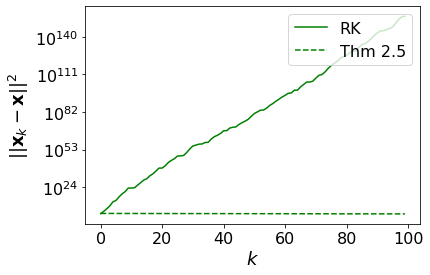

In [52]:
fig = plt.figure()

plt.plot(kacz_experiment_rk[1],kacz_experiment_rk[2],'g-')
plt.semilogy(list(range(num)),errors_rk,'g--')

#plt.title(r"$20000 \times 100$ Matrix, $\mu = 0$, $\sigma = 0$")
plt.rcParams.update({'font.size': 16})
plt.tick_params(labelsize=16)
plt.xlabel('$k$',{'size':18})
plt.ylabel('$||\mathbf{x}_k - \mathbf{x}||^2$',{'size':18})
plt.legend(['RK','Thm 2.5'],loc="upper right")
fig.show()